# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
station={"南港":"https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68",
         "台北":"https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490",
         "板橋":"https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f",
         "桃園":"https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd",
         "新竹":"https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4",
         "苗栗":"https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3",
         "台中":"https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779",
         "彰化":"https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e",
         "雲林":"https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f",
         "嘉義":"https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7",
         "台南":"https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814",
         "左營":"https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356"
        }
station_name=list(station.keys())

In [3]:
# crawler the address of each station
address=[]
for i in station_name:
    url=station[i]
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")
    addr=soup.find("a",class_="google-map-link orange")
    address.append(addr.text)

In [4]:
# crawler the operation hours and ticketing hours of each station
operation=[]
ticketing=[]
for i in station_name:
    url=station[i]
    response=requests.get(url)
    soup=BeautifulSoup(response.text,"html.parser")
    hours=soup.find_all("td",class_="gray")
    operation.append(re.sub("營業時間：","",hours[0].text))
    ticketing.append(re.sub("售票時間：","",hours[1].text))

In [5]:
# create a DataFrame
data={"station":station_name,
      "address":address,
      "operation_hours":operation,
      "ticketing_hours":ticketing
     }
df=pd.DataFrame(data)
df

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [6]:
# crawler GDP
url="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
response=requests.get(url)
soup=BeautifulSoup(response.text,"html.parser")
table=soup.find_all("tbody")
gdp=[]
for i in table:
    gdp.append(re.findall(".+",i.text))
gdp=gdp[2][11:]
gdp=gdp[:400]
country=[]
region=[]
imf_e=[]
imf_y=[]
une=[]
uny=[]
wbe=[]
wby=[]
for i in range(len(gdp)):
    if i%8==0:
        country.append(gdp[i][1:])
    elif i%8==1:
        region.append(gdp[i])
    elif i%8==2:
        imf_e.append(re.sub(",","",gdp[i]))
    elif i%8==3:
        imf_y.append(gdp[i][-4:])
    elif i%8==4:
        une.append(re.sub(",","",gdp[i]))
    elif i%8==5:
        uny.append(gdp[i][-4:])
    elif i%8==6:
        wbe.append(int(re.sub(",","",gdp[i])))
    elif i%8==7:
        wby.append(gdp[i])

In [7]:
# create GDP DataFrame
data={"Country":country,
      "Region":region,
      "IMF_Estimate":imf_e,
      "IMF_Year":imf_y,
      "United_Nations_Estimate":une,
      "United_Nations_Year":uny,
      "World_Bank_Estimate":wbe,
      "World_Bank_Year":wby
     }
df=pd.DataFrame(data)
df

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020
1,China,Asia,16642318,2021,14342933,2019,14722731,2020
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020
5,India,Asia,3049704,2021,2891582,2019,2622984,2020
6,France,Europe,2938271,2021,2715518,2019,2603004,2020
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020


In [8]:
# crawler CPI
url="https://en.wikipedia.org/wiki/Corruption_Perceptions_Index"
response=requests.get(url)
soup=BeautifulSoup(response.text,"html.parser")
table=soup.find_all("tbody")
cpi=[]
for i in table:
    cpi.append(re.findall("[\w\ \-]+",i.text))
cpi=cpi[4][37:]
cpi=cpi[:1632]
country_name=[]
score=[]
for i in range(len(cpi)):
    if cpi[i][0].isalpha():
        country_name.append(cpi[i])
        score.append(int(cpi[i+1]))

In [9]:
# CPI DataFrame
data1={"Country":country_name,
       "CPI_2020":score
      }
df1=pd.DataFrame(data1)
df1

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [10]:
# merge GDP and CPI DataFrame
df2=pd.merge(df,df1)
df2

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020,67
1,China,Asia,16642318,2021,14342933,2019,14722731,2020,42
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020,74
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020,77
5,India,Asia,3049704,2021,2891582,2019,2622984,2020,40
6,France,Europe,2938271,2021,2715518,2019,2603004,2020,69
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020,53
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020,61


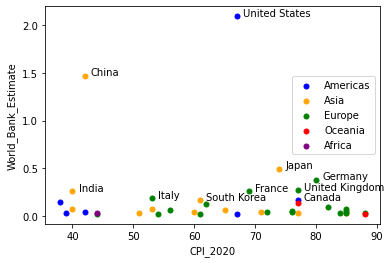

In [11]:
# plot
df2["World_Bank_Estimate"]=df2["World_Bank_Estimate"]/10000000
df3=df2.groupby("Region")
Ame=df3.get_group("Americas")
Asi=df3.get_group("Asia")
Eur=df3.get_group("Europe")
Oce=df3.get_group("Oceania")
Afr=df3.get_group("Africa")
plt.scatter(Ame["CPI_2020"],Ame["World_Bank_Estimate"],color="blue",s=25,label="Americas")
plt.scatter(Asi["CPI_2020"],Asi["World_Bank_Estimate"],color="orange",s=25,label="Asia")
plt.scatter(Eur["CPI_2020"],Eur["World_Bank_Estimate"],color="green",s=25,label="Europe")
plt.scatter(Oce["CPI_2020"],Oce["World_Bank_Estimate"],color="red",s=25,label="Oceania")
plt.scatter(Afr["CPI_2020"],Afr["World_Bank_Estimate"],color="purple",s=25,label="Africa")
plt.xlabel("CPI_2020")
plt.ylabel("World_Bank_Estimate")
plt.legend(loc="center right")
for i in range(10):
    plt.text(df2["CPI_2020"][i]+1,df2["World_Bank_Estimate"][i],df2["Country"][i])